# Amazon Product Analysis

A project to analyze an Amazon products dataset and generate various visualizations. Specifically, to focus on the top categories and manufacturers to understand their market presence and performance.

* Data Exploration and Cleaning

Explore the dataset to understand its structure and contents.
Identify and handle missing values, outliers, and any inconsistencies in the data.
Preprocess the dataset to ensure it's in a suitable format for analysis.

* Top Manufacturers Analysis

Identify the manufacturers with the highest number of products listed on Amazon.
Plot a chart showcasing the top manufacturers and the number of products they contribute to the platform.
Investigate prices of products from these top manufacturers.

* Top Categories Analysis

Determine the top product categories based on the number of products available in each category.
Visualize the distribution of products across different categories using appropriate charts.

* Discount Analysis

Analysis based on effect of discount on the selling of products

# Dataset

Link of the dataset used in this project: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset                                                 
Description of the dataset : 
* 'name' : The name of the product
* 'main_category': The main category of the product belong
* 'sub_category': The main category of the product belong
* 'image': The image of the product look like
* 'link': The amazon website reference link of the product
* 'ratings': The ratings given by amazon customers of the product
* 'no of ratings': The number of ratings given to this product in amazon shopping
* 'discount_price': The discount prices of the product
* 'actual_price': The actual MRP of the product

# Analysis

In [233]:
# import required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


sns.set_theme(style="darkgrid")

In [387]:
df = pd.read_csv('Amazon-Products.csv') 
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [389]:
df.shape

(551585, 10)

In [312]:
df.shape

(551585, 10)

## Data preprocessing

In [391]:
df.isnull().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [411]:
df=df[df["ratings"].notnull()]
df.isnull().sum()

Unnamed: 0            0
name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings               0
no_of_ratings         0
discount_price    35111
actual_price       6761
dtype: int64

In [415]:
df["discount_price"]=df["discount_price"].fillna(0)
df.isnull().sum()

Unnamed: 0           0
name                 0
main_category        0
sub_category         0
image                0
link                 0
ratings              0
no_of_ratings        0
discount_price       0
actual_price      6761
dtype: int64

In [270]:
from sklearn.impute import SimpleImputer

In [417]:
# remove the '₹' symbol
df['actual_price'] = df['actual_price'].astype(str).str.replace(r'[₹,]', '', regex=True)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

In [419]:
df["actual_price"]

0         58990.0
1         75990.0
2         61990.0
3         68990.0
4         67790.0
           ...   
551580     4599.0
551581     1999.0
551582     1999.0
551583        NaN
551584     1299.0
Name: actual_price, Length: 375791, dtype: float64

In [421]:
si=SimpleImputer(strategy="mean")
df["actual_price"]=si.fit_transform(df[["actual_price"]])

In [425]:
df.isnull().sum().sum()

0

In [427]:
# drop unnecessary columns
df = df.drop(['Unnamed: 0', 'image', 'link'], axis=1)

In [429]:
# check for duplicates
df.duplicated().any()

True

In [431]:
df.drop_duplicates(inplace=True)

In [433]:
df.duplicated().sum()

0

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360589 entries, 0 to 551584
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            360589 non-null  object 
 1   main_category   360589 non-null  object 
 2   sub_category    360589 non-null  object 
 3   ratings         360589 non-null  object 
 4   no_of_ratings   360589 non-null  object 
 5   discount_price  360589 non-null  object 
 6   actual_price    360589 non-null  float64
dtypes: float64(1), object(6)
memory usage: 22.0+ MB


# Rating

In [446]:
# overview of the unique values of this column
df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

There are non numeric values in the column. Strip those and change the column type

In [448]:
# remove non numeric values
dirty_value = ['Get', 'FREE', '₹68.99', '₹65', '₹70','₹100','₹99', '₹2.99']
df['ratings'] = df['ratings'].replace(dirty_value, '0')

# change column type
df['ratings'] = df['ratings'].astype('float')
df['ratings'].dtypes

dtype('float64')

### no_of_ratings

In [450]:
df['no_of_ratings'].unique()

array(['2,255', '2,948', '1,206', ..., '3,329', '7,141', '4,406'],
      dtype=object)

In [452]:
# replace the comma ',' by '' nothing 
df['no_of_ratings'] = df['no_of_ratings'].replace(',','', regex = True)

df['no_of_ratings'].unique()

array(['2255', '2948', '1206', ..., '3329', '7141', '4406'], dtype=object)

In [458]:
# find the non numeric values
non_numeric_values = df.loc[pd.to_numeric(df['no_of_ratings'], errors='coerce').isna(), 'no_of_ratings']

non_numeric_values.unique()

array(['Only 2 left in stock.', 'Only 1 left in stock.',
       'FREE Delivery by Amazon', 'Usually dispatched in 2 to 3 days.',
       'Usually dispatched in 5 to 6 days.',
       'Usually dispatched in 4 to 5 days.',
       'Usually dispatched in 6 to 7 days.',
       'Usually dispatched in 7 to 8 days.', 'Only 3 left in stock.',
       'Usually dispatched in 3 to 4 weeks.',
       'Usually dispatched in 4 to 5 weeks.', 'Only 5 left in stock.',
       'Only 4 left in stock.', 'Usually dispatched in 3 to 5 days.',
       'Usually dispatched in 11 to 12 days.',
       'Usually dispatched in 9 to 10 days.',
       'Usually dispatched in 2 to 3 weeks.',
       'Usually dispatched in 8 to 9 days.',
       'Usually dispatched in 1 to 2 months.',
       'This item will be released on August 14 2023.'], dtype=object)

In [460]:
# replacing non numeric value by '0'
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce').fillna('0')

# change the column type
df['no_of_ratings'] = df['no_of_ratings'].astype('float')
df['no_of_ratings'].dtypes

dtype('float64')

### discount_price 

In [462]:
# overview of the unique values 
df['discount_price'].unique()

array(['₹32,999', '₹46,490', '₹34,490', ..., '₹3,712.10', '₹1,429.60',
       '₹651.01'], dtype=object)

In [470]:
# remove the '₹' symbol
df['discount_price'] = df['discount_price'].astype(str).str.replace(r'[₹,]', '', regex=True)
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')

df["discount_price"]=df["discount_price"].fillna('0')

# change the column type to float
df['discount_price'] = df['discount_price'].astype('float')
df['discount_price'].dtypes
# remove the ','
df['discount_price'] = df['discount_price'].astype(str).str.replace(',','')


In [474]:
# find non numeric values
non_numeric_values = df.loc[~pd.to_numeric(df['discount_price'], errors='coerce').notna(), 'discount_price']

non_numeric_values.unique()

array([], dtype=object)

### actual_price

In [476]:
df['actual_price'].unique()

array([58990.  , 75990.  , 61990.  , ...,   608.97,  8023.6 , 32120.  ])

In [480]:
df["actual_price"]

0         58990.000000
1         75990.000000
2         61990.000000
3         68990.000000
4         67790.000000
              ...     
551580     4599.000000
551581     1999.000000
551582     1999.000000
551583    30465.488802
551584     1299.000000
Name: actual_price, Length: 360589, dtype: float64

Find non numeric values

In [482]:
# find non numeric values
non_numeric_values = df.loc[~pd.to_numeric(df['actual_price'], errors='coerce').notna(), 'actual_price']
non_numeric_values.unique()

array([], dtype=float64)

In [484]:
# change the column type to float
df['actual_price'] = df['actual_price'].astype('float')
df['actual_price'].dtypes

dtype('float64')

### Create a manufacturer column 


In [64]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206.0,34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,34490.0,67790.0


From the data it can be noticed that the manufacturers names are the first word of each row of the name's column.

In [486]:
df['name'] = df['name'].str.replace('The ', '')
df['manufacturer'] = df['name'].apply(lambda x: x.split(' ')[0])
df.head(2)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,manufacturer
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0,Lloyd
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,46490.0,75990.0,LG


## EDA 

In [490]:
df.describe()

,ratings,no_of_ratings,actual_price
count,360589.000000,360589.000000,3.605890e+05
mean,3.764934,817.370394,3.160510e+04
std,0.900027,8567.290569,1.648683e+07
min,0.000000,0.000000,0.000000e+00
25%,3.500000,4.000000,8.990000e+02
50%,3.900000,19.000000,1.499000e+03
75%,4.200000,128.000000,2.999000e+03
max,5.000000,589547.000000,9.900000e+09


In [488]:
df.isna().sum()

name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
manufacturer      0
dtype: int64

In [494]:
df.reset_index(drop=True, inplace=True)

In [496]:
#remove all the row with Nan 
df = df.dropna(subset = ['ratings', 'actual_price', 'discount_price']).reset_index(drop=True)
df.shape

(360589, 8)

Top 10 products with the highest price

In [498]:
df.nlargest(10,'actual_price')

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,manufacturer
146257,"Marutivilla Insect Killer, Mosquito Killer Lig...",home & kitchen,Garden & Outdoors,2.0,1.0,589.0,9.900000e+09,Marutivilla
272779,Clovia Women's Activewear Ankle Length Printed...,sports & fitness,Running,3.2,4.0,688.0,6.108299e+07,Clovia
327088,Samsung 214 cm (85 inches) 8K Ultra HD Smart N...,"tv, audio & cameras",Televisions,4.0,10.0,1249990.0,1.594900e+06,Samsung
147146,Sri Jagdamba Pearls 10 Gm 24kt (999) Yellow Go...,accessories,Gold & Diamond Jewellery,4.4,4.0,66305.0,7.003000e+05,Sri
326912,Sony Bravia 195 cm (77 inches) XR Series 4K Ul...,"tv, audio & cameras",Televisions,4.7,439.0,455990.0,6.999000e+05,Sony
60796,Canon EOS 1DX Mark III,"tv, audio & cameras",Cameras,4.2,12.0,0.0,6.094950e+05,Canon
327082,Samsung 189 cm (75 inches) 4K Ultra HD Smart N...,"tv, audio & cameras",Televisions,4.0,18.0,409990.0,5.899000e+05,Samsung
65772,Canon EOS R3 Full-Frame Mirrorless Camera Body...,"tv, audio & cameras",Cameras,5.0,1.0,0.0,4.999950e+05,Canon
326918,Sony Bravia 164 cm (65 inches) XR Series 4K Ul...,"tv, audio & cameras",Televisions,4.4,44.0,322990.0,4.799000e+05,Sony
327072,Samsung 189 cm (75 inches) Frame Series 4K Sma...,"tv, audio & cameras",Televisions,4.1,844.0,294990.0,4.249000e+05,Samsung


There is an inconsistancy between the first two products actual prices and their discount prices.

In [500]:
# remove those two rows
df = df.drop([261431,141117], axis=0).reset_index(drop=True)

Top 10 most popular products based on number of ratings

In [502]:
df.nlargest(10, 'no_of_ratings')

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,manufacturer
49938,SanDisk 128GB Class 10 microSDXC Memory Card w...,"tv, audio & cameras",Camera Accessories,4.3,589547.0,1705.0,3999.0,SanDisk
50111,SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQ...,"tv, audio & cameras",Camera Accessories,4.3,589547.0,495.0,500.0,SanDisk
50258,SanDisk Ultra 64GB UHS-I Class 10 Micro SD Mem...,"tv, audio & cameras",Camera Accessories,4.3,589547.0,750.0,1000.0,SanDisk
50515,SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Mem...,"tv, audio & cameras",Camera Accessories,4.3,589547.0,523.0,700.0,SanDisk
51603,SanDisk 256GB Class 10 MicroSD Card with Adapt...,"tv, audio & cameras",Camera Accessories,4.3,589547.0,3324.0,7999.0,SanDisk
55033,SanDisk 400GB Class 10 MicroSD Card (SDSQUAR-4...,"tv, audio & cameras",Camera Accessories,4.3,589547.0,15600.0,22289.0,SanDisk
56366,SanDisk 512GB Ultra MicroSDXC UHS-I Memory Car...,"tv, audio & cameras",Camera Accessories,4.3,589547.0,8022.0,15000.0,SanDisk
58052,SanDisk 128GB Class 10 microSDXC Memory Card w...,"tv, audio & cameras",Cameras,4.3,589547.0,1705.0,3999.0,SanDisk
58321,SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQ...,"tv, audio & cameras",Cameras,4.3,589547.0,495.0,500.0,SanDisk
58545,SanDisk Ultra 64GB UHS-I Class 10 Micro SD Mem...,"tv, audio & cameras",Cameras,4.3,589547.0,750.0,1000.0,SanDisk


Observation: Based on ratings, SanDisk Memory Cards are the most popular products

### Top 10 most popular manufacturers

In [92]:
# using the groupby function
top_manufactures = df.groupby('manufacturer', as_index=False).size().sort_values('size',ascending=False)
top_manufactures

,manufacturer,size
25212,Puma,3558
2584,Amazon,3443
26537,Red,2094
32906,U.S.,1946
6505,Campus,1783
...,...,...
24151,"Paddy,",1
8600,DearHouse,1
24148,Padchaaya,1
8604,Decama,1


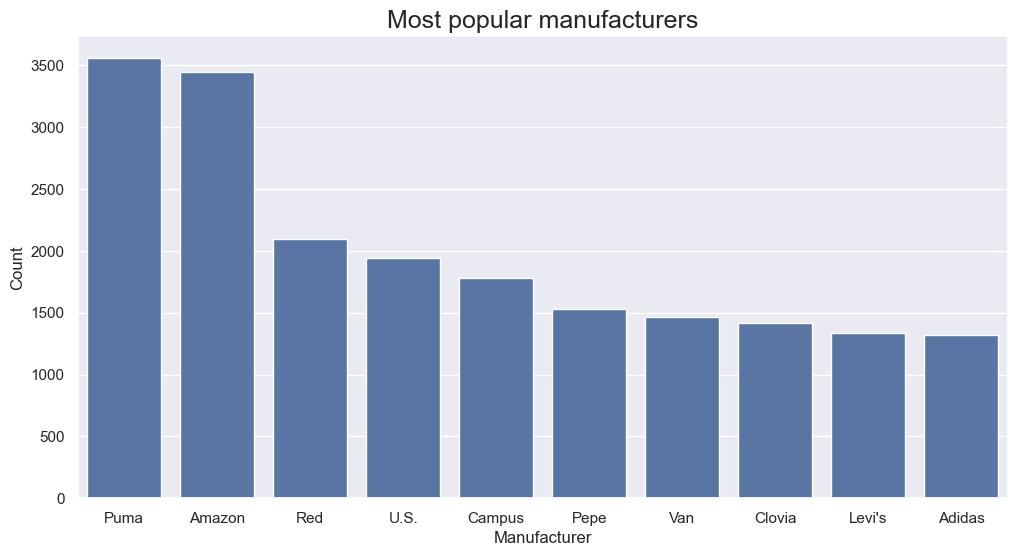

In [94]:
# barplot to easily see which is the most popular manufacturer
plt.figure(figsize=(12,6))
sns.barplot(data=top_manufactures[:10], x='manufacturer', y='size')

plt.title('Most popular manufacturers', fontdict={'fontsize':18})
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

Observation: `Puma` and `Amazon` are the two most popular manufacturers.

### Distribution of the ratings

Create a new dataframe of the 10 top manufacturers

In [124]:
ten_manufact = top_manufactures.iloc[:10]['manufacturer'].to_list() 
top = df[df['manufacturer'].isin(ten_manufact)]
top

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,manufacturer
62,"Amazon Basics 1 Ton, 5 Star, Wi-Fi Enabled Sma...",appliances,Air Conditioners,3.6,88.0,28990.00,49089.0,Amazon
76,"Amazon Basics 1.5 Ton, 5 Star, Wi-Fi Enabled S...",appliances,Air Conditioners,3.4,39.0,34990.00,56179.0,Amazon
101,Amazon Basics 1 Ton 4 Star Fixed Speed Window ...,appliances,Air Conditioners,3.5,14.0,25490.00,33990.0,Amazon
652,Amazon Basics 300 W Hand Blender with Stainles...,appliances,All Appliances,4.0,182.0,899.00,1999.0,Amazon
686,"Amazon Brand Solimo Laundry Basket with Lid, 5...",appliances,All Appliances,2.6,39.0,829.00,1059.0,Amazon
...,...,...,...,...,...,...,...,...
340649,Amazon Brand - Symactive Men's Activewear Gym ...,sports & fitness,Yoga,0.0,0.0,699.00,2199.0,Amazon
340650,Amazon Brand - Symactive Men's Activewear Gym ...,sports & fitness,Yoga,0.0,0.0,651.01,2399.0,Amazon
340666,Adidas Men's Standard,sports & fitness,Yoga,3.4,16.0,1349.00,4299.0,Adidas
340669,Amazon Brand - Symactive Men Shorts,sports & fitness,Yoga,5.0,2.0,655.04,2399.0,Amazon


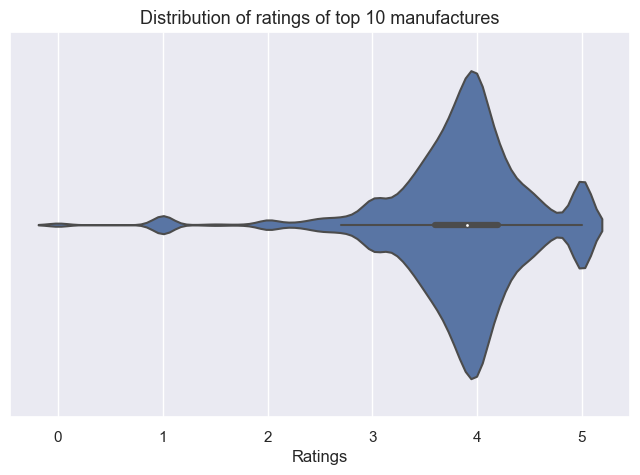

In [125]:
# violion chart to see the distribution of the ratings
plt.figure(figsize=(8,5))
sns.violinplot(data=top, x='ratings',bins=30)

plt.title('Distribution of ratings of top 10 manufactures', fontdict={'fontsize':13})
plt.xlabel('Ratings')
plt.show()

Observation: The average rating of each product of the top 10 manufacturers is generally between 4 and 5.

### Distribution of the number of reviews

In [126]:
#histogram
fig = px.histogram(top, x='no_of_ratings')
fig.update_layout(title = "Distribution of the number of reviews",
                 xaxis_title = "Number_reviews")
fig.show()


Observation: More than 19K products have under 999 reviews,925 products have between 1000 and 3999 reviews and 178 products have between 4000 and 7999 reviews.


### Distribution of the price

In [127]:
# boxplot to see the distribution and also outliers
fig = px.box(top, x="actual_price",
            hover_data= ['manufacturer','main_category','ratings'])

fig.update_layout(title = "Distribution of the price of the top 10 manufactures",
                 xaxis_title = "price")

fig.show()

Observation: The major part of the products price made of these 10 manufacturers is below ₹3800.           

In [128]:
price_outlier = top[top['actual_price']>=6500].groupby('manufacturer',as_index=False).size().sort_values('size',ascending=False)
price_outlier

,manufacturer,size
4,Puma,633
5,Red,357
0,Adidas,211
1,Amazon,75
2,Levi's,25
3,Pepe,5
6,U.S.,2
7,Van,1


Text(0.5, 1.0, 'Outliers by category')

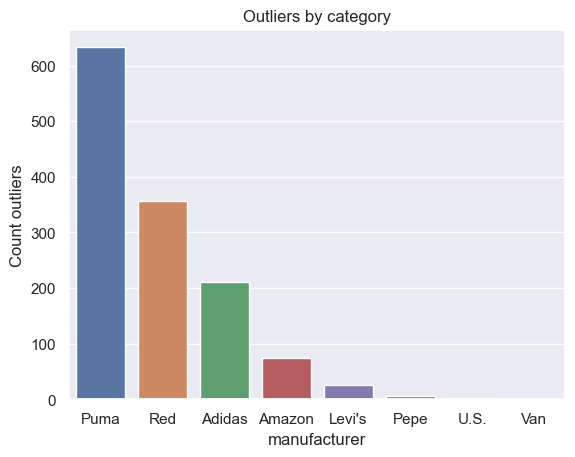

In [129]:
# barplot to see the manufacturer with the highest number of outliers
sns.barplot(data = price_outlier, x='manufacturer',y='size')
plt.ylabel('Count outliers')
plt.title('Outliers by category')

Observation: Puma  and Red have the highest number of outliers in term of price.

### Distribution of the discount percentage 
**discount percentage = (actual_price - discount_price)/actual_price**

In [130]:
# create a new column for discount%
top['discount_percentage'] = np.where(top['actual_price']!=0,round((top['actual_price']-top['discount_price'])/top['actual_price'],2),0)
top.head(3)

C:\Users\Sarthak Gour\AppData\Local\Temp\ipykernel_3064\3531355471.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,manufacturer,discount_percentage
62,"Amazon Basics 1 Ton, 5 Star, Wi-Fi Enabled Sma...",appliances,Air Conditioners,3.6,88.0,28990.0,49089.0,Amazon,0.41
76,"Amazon Basics 1.5 Ton, 5 Star, Wi-Fi Enabled S...",appliances,Air Conditioners,3.4,39.0,34990.0,56179.0,Amazon,0.38
101,Amazon Basics 1 Ton 4 Star Fixed Speed Window ...,appliances,Air Conditioners,3.5,14.0,25490.0,33990.0,Amazon,0.25


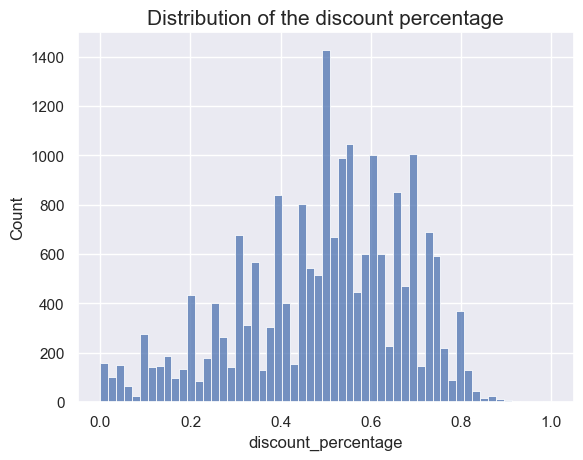

In [131]:
# plot the distribution of discount_percentage
sns.histplot(data= top,x='discount_percentage')
plt.title('Distribution of the discount percentage',fontdict={'fontsize':15})
plt.show()

Observation: Most of the Top 10 manufacturer's discount percentage per product is around 50% to 60%

### Impact of discount_percentage on the number of reviews

[Text(0.5, 1.0, 'Discount percentage vs No. of reviews')]

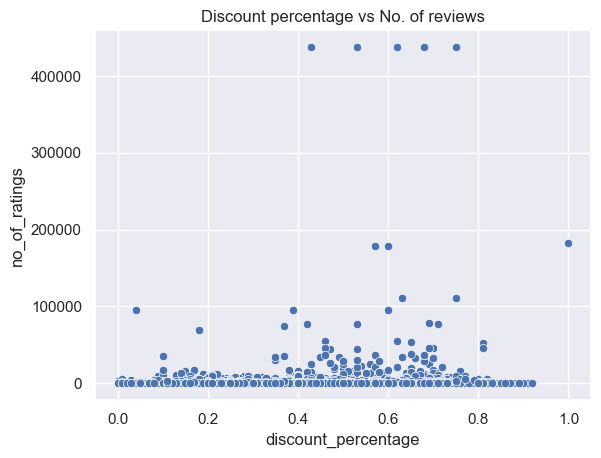

In [132]:
sns.scatterplot(data=top, x='discount_percentage', y='no_of_ratings').set(title='Discount percentage vs No. of reviews')

Observation: With increase in discount, number of ratings increases

### Most popular categories overall

In [133]:
overall_popular_category = df.groupby('main_category',as_index=False).size().sort_values('size',ascending=False)
overall_popular_category

,main_category,size
0,accessories,64690
18,women's clothing,60453
17,"tv, audio & cameras",47957
10,men's clothing,37098
1,appliances,25973
11,men's shoes,24895
15,stores,22301
6,home & kitchen,12659
14,sports & fitness,8320
3,beauty & health,6915


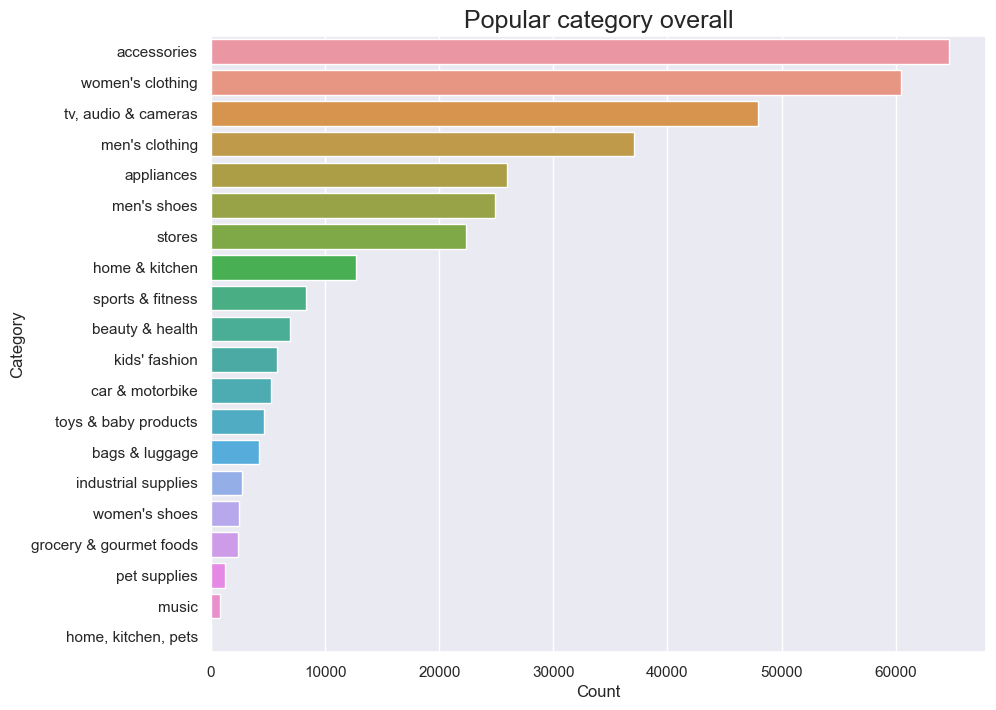

In [134]:
# bar chart
plt.figure(figsize=(10,8))
sns.barplot(data=overall_popular_category, y='main_category', x='size')

plt.title('Popular category overall', fontdict={'fontsize':18})
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

Observation: `Accessories` and `Women's clothings` are the most popular categories overall on amazon

### Most popular category of the top 10 manufacturers

In [135]:
popular_category = top.groupby('main_category',as_index=False).size().sort_values('size',ascending=False)
popular_category

,main_category,size
9,men's clothing,6569
10,men's shoes,4599
16,women's clothing,3418
13,stores,2808
12,sports & fitness,655
0,accessories,591
15,"tv, audio & cameras",405
6,home & kitchen,257
8,kids' fashion,229
1,appliances,135


In [504]:
# bar chart
plt.figure(figsize=(10,8))
sns.barplot(data=popular_category, y='size', x='main_category')

plt.title('Popular category among top 10 manufactures', fontdict={'fontsize':18})
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

NameError: name 'popular_category' is not defined

<Figure size 1000x800 with 0 Axes>

Observation: `Men's clothing` and `Men's shoes` are the most popular categories among the top manufactures

### Popular men's clothing subcategories

In [137]:
sub_men_clothing = top[top['main_category'].isin(["men's clothing"])].groupby('sub_category',as_index=False).size().sort_values('size',ascending=False)
sub_men_clothing

,sub_category,size
2,Shirts,2253
3,T-shirts & Polos,2202
1,Jeans,1515
0,Innerwear,599


Text(0, 0.5, 'count')

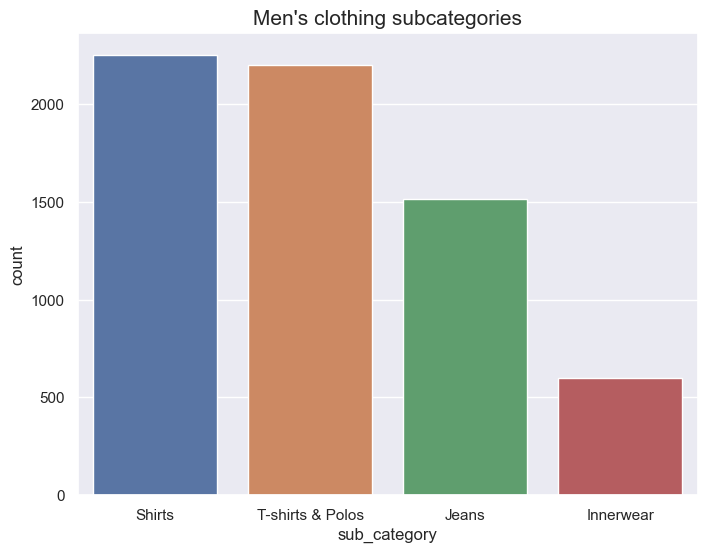

In [138]:
# bar chart
plt.figure(figsize=(8,6))
sns.barplot(data = sub_men_clothing, x='sub_category',y='size')
plt.title("Men's clothing subcategories",fontdict={'fontsize':15})
plt.ylabel('count')

Observation: `T-shirt`, `Polos` and `Shirts` are the most popular subcategories of the men's clothing category 

### Popular men's shoes subcategories

In [139]:
sub_men_shoes = top[top['main_category'].isin(["men's shoes"])].groupby('sub_category',as_index=False).size().sort_values('size',ascending=False)
sub_men_shoes

,sub_category,size
2,Sports Shoes,2492
0,Casual Shoes,1696
1,Formal Shoes,411


Text(0, 0.5, 'count')

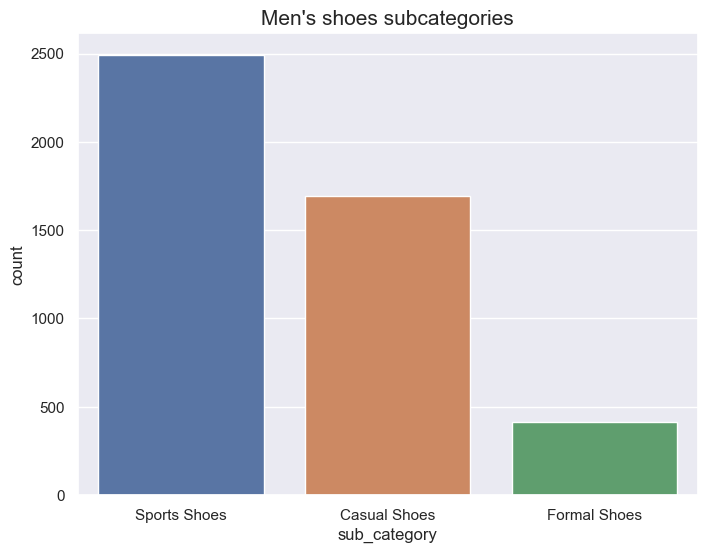

In [140]:
# bar chart
plt.figure(figsize=(8,6))
sns.barplot(data = sub_men_shoes, x='sub_category',y='size')
plt.title("Men's shoes subcategories",fontdict={'fontsize':15})
plt.ylabel('count')

`Sports shoes` and `casual shoes` are the most popular subcategories of the men's shoes category

### Popular women's clothing subcategories

In [141]:
sub_women_clothing = top[top['main_category'].isin(["women's clothing"])].groupby('sub_category',as_index=False).size().sort_values('size',ascending=False)
sub_women_clothing

,sub_category,size
2,Lingerie & Nightwear,1268
3,Western Wear,1052
0,Clothing,830
1,Ethnic Wear,268


Text(0, 0.5, 'count')

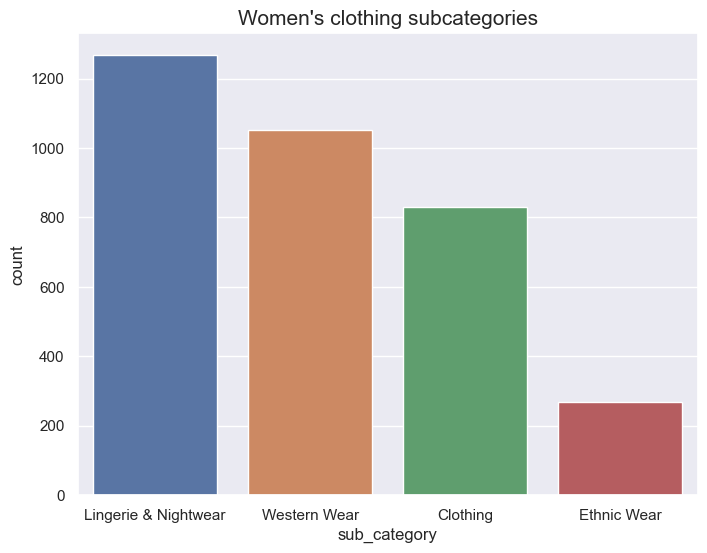

In [142]:
# bar chart
plt.figure(figsize=(8,6))
sns.barplot(data = sub_women_clothing, x='sub_category',y='size')
plt.title("Women's clothing subcategories",fontdict={'fontsize':15})
plt.ylabel('count')

Observation: `Nightwear` and `western wear` are the most popular subcategories of the women's clothing category 

### Popular accessory subcategories

In [143]:
sub_accessories = top[top['main_category'].isin(["accessories"])].groupby('sub_category',as_index=False).size().sort_values('size',ascending=False)
sub_accessories

,sub_category,size
0,Bags & Luggage,331
2,Handbags & Clutches,126
1,Fashion & Silver Jewellery,76
4,Watches,38
3,Jewellery,20


Text(0, 0.5, 'count')

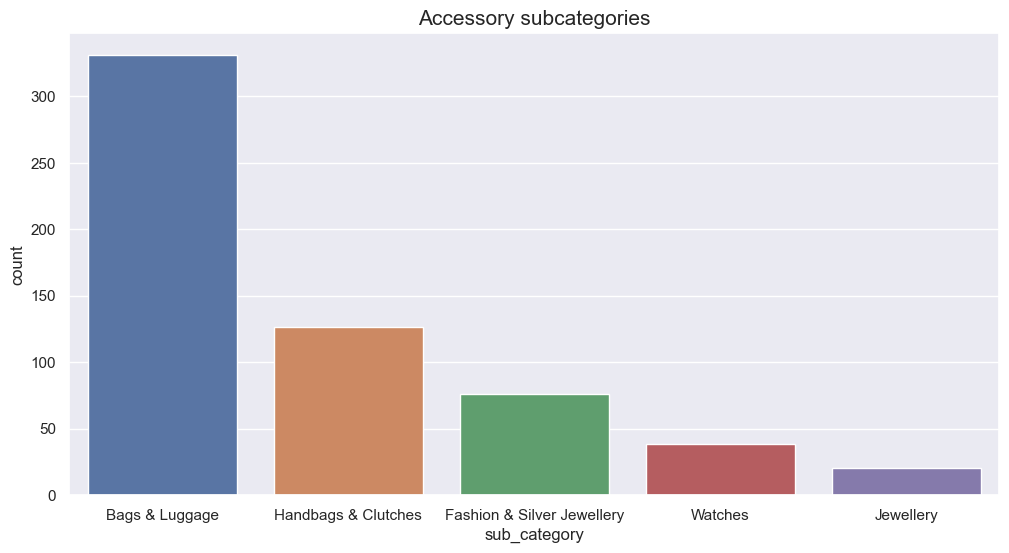

In [144]:
# bar chart
plt.figure(figsize=(12,6))
sns.barplot(data = sub_accessories, x='sub_category',y='size')
plt.title("Accessory subcategories",fontdict={'fontsize':15})
plt.ylabel('count')

Observation: `Bags` are the most popular accessories

#  Conclusion

* Most popular products are the SanDisk Memory Cards.
* The most popular manufacturers on Amazon are : PUMA, AMAZON, THE, RED, U.S., CAMPUS, PEPE, VAN, CLOVIA, LEVI'S.
* The ratings of the top10 manufacturers is usually between 4 and 5.
* The main part of those 10 manufacturers' products have less than 1000 reviews.
* Majority of popular product prices are below ₹3400.
* Puma and Red have the highest number of outliers in term of price.(Many the have the most high end products).
* The discount percentage of most product is usually between 50% to 60%.
* As the discount percentage increases, so does the number of product reviews.
* Bag or Handbag accessories and women's clothing are most popular categories overall.
* Men's clothing and shoes are the most popular categories of the top10 manufacturers.
